# Лекция 3
## Часть 1. Умножение матрицы на вектор и умножение матриц, иерархия памяти и алгоритм Штрассена

## На прошлой лекции

- Ранг матрицы
- Малоранговая аппроксимация
- SVD и теорема Eckart'a-Young'a
- Линейные системы
- Ряд Неймана и число обусловленности
- Линейная задача наименьших квадратов

## Примеры пиковой производительности

**Flops** –– число операций над числами с плавающей точкой в секунду (floating point operations per second).

Гига = $2^{30} \approx 10^9$,  
Тера = $2^{40} \approx 10^{12}$,      
Пета = $2^{50} \approx 10^{15}$,       
Экза = $2^{60} \approx 10^{18}$ 

Какова **пиковая производительность**:

1. Cовременных CPU?
2. Cовремененных GPU?
3. Cамого большого суперкомпьютера? 

### Тактовая частота CPU vs. производительность в flops

FLOPS = sockets * (cores per socket) * (number of clock cycles per second) * (number of floating point operations per cycle).

- Обычно sockets = 1
- Число ядер обычно 2 или 4
- Число тактов в секунду - это привычная частота
- Число операций за один такт зависит от конкретного процессора

1. Современных CPU (Intel Core i7)   –– 400 Gflops
2. Современных GPU (NVidia Titan X) –– 12 Tflops single precision 
3. [Самый большой суперкомпьютер](https://www.top500.org/lists/2019/06/) –– 200.79 Pflops 

## Умножение матрицы на вектор (matvec)

Умножение матрицы $A$ размера $n\times n$ на вектор $x$ размера $n\times 1$ ($y=Ax$):

$$
y_{i} = \sum_{i=1}^n a_{ij} x_j
$$

требует $n^2$ умножений и $n(n-1)$ сложений. Таким образом, общая сложность равна $2n^2 - n =$ <font color='red'> $\mathcal{O}(n^2)$ </font>

## Насколько плоха сложность $\mathcal{O}(n^2)$?

- Пусть $A$ – матрица попарных гравитационных взаимодействий между планетами в галактике.

- Число планет в средней галактике $10^{11}$, поэтому размер этой матрицы $10^{11} \times 10^{11}$.

- Для моделирования эволюции во времени нам нужно умножать эту матрицу на вектор для получения состояния в каждый момент времени.

- Лучшие суперкомпьютеры делают примерно $10^{16}$ операций в секунду (flops), поэтому для умножения матрицы на вектор нам потребуется примерно

$$
\frac{(10^{11})^2 \text{ операций}}{10^{16} \text{ flops}} = 10^6 \text{ сек.} \approx 11.5 \text{ дней} 
$$

для одного шага по времени. Если бы мы могли умножать матрицу на вектор за $\mathcal{O}(n)$ операций, мы бы получили

$$
\frac{10^{11} \text{ операций}}{10^{16} \text{ flops}} = 10^{-5} \text{ сек}.
$$

Далее посмотрим видео, моделирующее столкновение двух галактик, которое было получено с использованием алгоритма умножения матрицы на вектор со сложностью $\mathcal{O}(n \log n)$:

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("7HF5Oy8IMoM")

## Можно ли умножить матрицу на вектор быстрее $\mathcal{O}(n^2)$?

- Вообще говоря **НЕТ**. 
- Это связано с тем, что мы имеем $\mathcal{O}(n^2)$ входных данных, поэтому для произвольной матрицы быстрее выполнить умножение нельзя.
- К счастью, мы можем  умножать матрицу на вектор быстрее <font color='red'>для определённого класса матриц</font>.
Например:

    * <font color='red'>Малоранговые</font> матрицы (или матрицы с малоранговыми блоками)

    * <font color='red'>Разреженные</font> матрицы с $\mathcal{O}(n)$ ненулевыми элементами

    * <font color='red'>Структурированные</font> матрицы:
      * Фурье
      * Циркулянтные
      * Тёплицевы 
      * Ганкелевы

## Произведение матриц

Рассмотрим композицию линейных операторов:

1. $y = Bx$
2. $z = Ay$

Тогда, $z = Ay =  A B x = C x$, где $C$ – **произведение двух матриц**.

## Классическое определение

**Определение**. Произведение матрицы $A$ размера $n \times k$ и матрицы $B$ размера $k \times m$ – это матрица $C$ размера $n \times m$ такая что её элементы записываются как 
$$
   c_{ij} = \sum_{s=1}^k a_{is} b_{sj}, \quad i = 1, \ldots, n, \quad j = 1, \ldots, m 
$$

Для $m=k=n$ сложность наивного алгоритма составляет $2n^3 - n^2 =$ <font color='red'>$\mathcal{O}(n^3)$</font>. 

## Обсуждение

- Умножение матриц – это основная операция, необходимая для почти всех эффективных алгоритмов в вычислительной линейной алгебре.

- Говоря нестрого, все алгоритмы для решения задач вычислительной линейной алгебры с плотными матрицами сводятся к последовательности умножений матриц.

- Повышение эффективности умножения матриц, пропорционально увеличивает эффективность алгоритмов, которые используют эту операцию (то есть почти всех).

- Однако реализация быстрых методов для умножения матриц – непростая задача!

## Эффективная реализация алгоритмов вычисления произведения матриц

**Вопрос**: Легко ли вычислить произведение матриц наиболее эфективным образом?

## Ответ: нет, это не легко!

Если вы хотите вычислить произведение как можно быстрее, используя обычный компьютер.

## Демо

Сравним время вычисления произведения матриц для следующих реализаций

- стандартная функция `np.dot()`
- рукописная реализация алгоритма 
- Numba версия рукописной реализации

In [2]:
import numpy as np
def matmul(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1]  
    c = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            for s in range(k):
                c[i, j] += a[i, s] * b[s, j]
                
    return c

In [3]:
import numpy as np
from numba import jit # Just-in-time compiler for Python, see http://numba.pydata.org 

@jit(nopython=True)
def numba_matmul(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1]
    c = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            for s in range(k):
                c[i, j] += a[i, s] * b[s, j]
    return c

Теперь давайте сравним время вычислений.

Попробуйте угадать ответ :)

In [4]:
n = 100
a = np.random.randn(n, n)
b = np.random.randn(n, n)

%timeit matmul(a, b)
%timeit numba_matmul(a, b)
%timeit np.dot(a, b)

536 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.02 ms ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
18.4 µs ± 852 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Для всех ли размерностей выполнены такие соотношения?

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

dim_range = [10*i for i in range(1, 11)]
time_range_matmul = []
time_range_numba_matmul = []
time_range_np = []
for n in dim_range:
    print("Dimension = {}".format(n))
    a = np.random.randn(n, n)
    b = np.random.randn(n, n)

    t = %timeit -o -q matmul(a, b)
    time_range_matmul.append(t.average)
    t = %timeit -o -q numba_matmul(a, b)
    time_range_numba_matmul.append(t.average)
    t = %timeit -o -q np.dot(a, b)
    time_range_np.append(t.average)

Dimension = 10
Dimension = 20
Dimension = 30
Dimension = 40
Dimension = 50
Dimension = 60
Dimension = 70
Dimension = 80
Dimension = 90
Dimension = 100


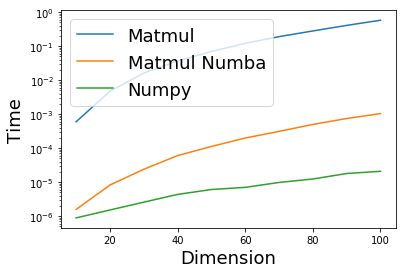

In [11]:
plt.plot(dim_range, time_range_matmul, label="Matmul")
plt.plot(dim_range, time_range_numba_matmul, label="Matmul Numba")
plt.plot(dim_range, time_range_np, label="Numpy")
plt.legend(fontsize=18)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Time", fontsize=18)
plt.yscale("log")

## Почему наивная реализация такая медленная?

Это так по двум причинам:

- Она не использует преимуществ быстрой памяти (кэшей) и в целом архитектуру памяти
- Она не использует параллелизм (особенно важно для GPU)

## Архитектура памяти  
<img width=80% src="./Memory-Hierarchy.jpg">

- "Быстрой" памяти мало
- "Медленной" памяти много

## Реализация алгоритмов наиболее вычислительно интенсивным образом

<font color='red'>**Эффективные реализации для задач NLA**</font> используют блочные версии алгоритмов. <br>

Эта идея лежит в основе **[BLAS (Basic Linear Algebra Subroutines)](http://www.netlib.org/blas/)**, написанной на Фортране много лет назад, однако до сих пор не потерявшей актуальность. 

Разделим матрицу на блоки! Для примера рассмотрим разбиение на блочную матрицу размера $2 \times 2$:

$$
   A = \begin{bmatrix}
         A_{11} & A_{12} \\
         A_{21} & A_{22}
        \end{bmatrix}, \quad B = \begin{bmatrix}
         B_{11} & B_{12} \\
         B_{21} & B_{22}
        \end{bmatrix}$$

Тогда  

$$AB = \begin{bmatrix}A_{11} B_{11} + A_{12} B_{21} & A_{11} B_{12} + A_{12} B_{22} \\
            A_{21} B_{11} + A_{22} B_{21} & A_{21} B_{12} + A_{22} B_{22}\end{bmatrix}.$$  

Если $A_{11}, B_{11}$ и их произведение помещается в кэш-память (которая достигает 12 Мб (L3) в [последнем CPU от Intel](https://en.wikipedia.org/wiki/List_of_Intel_microprocessors#Desktop)), тогда мы только один раз загружаем их в память.  

## BLAS

BLAS имеет три уровня:
1. BLAS-1,  операции типа $c = a + b$
2. BLAS-2, операции типа умножения матрицы на вектор
3. BLAS-3, произведение матриц

**Q:** Какова принципиальная разница между ними?

**A:** основная разница в соотношении между количеством операций и количеством данным!

1. BLAS-1: $\mathcal{O}(n)$ данных, $\mathcal{O}(n)$ операций
2. BLAS-2: $\mathcal{O}(n^2)$ данных, $\mathcal{O}(n^2)$ операций
3. BLAS-3: $\mathcal{O}(n^2)$ данных, $\mathcal{O}(n^3)$ операций

## Почему BLAS так важна и актуальна?

1. Стандартные реализации базовых операций линейной алгебры
2. Сохраняются стандартные имена для всех операций, сохраняющиеся в каждой новой реализации (например [ATLAS](https://www.netlib.org/atlas/), [OpenBLAS](https://www.openblas.net/), [MKL](https://software.intel.com/en-us/mkl)). Вы можете вызвать функцию умножения матриц (GEMM) в вашем коде, слинковать его с любой реализацией BLAS, и всё будет корректнро работать
3. Позволяет формулировать новые алгоритмы в терминах BLAS операций – гарантии скорости
4. Есть обёртки для большинства популярных языков

## Реализации BLAS и их использование

1. [ATLAS](http://math-atlas.sourceforge.net) - Automatic Tuned Linear Algebra Software. Она автоматически адаптируется под архитектуру конкретного компьютера.
2. [LAPACK](http://www.netlib.org/lapack/) - Linear Algebra Package. Она выполняет высокоуровневые операции (например матричные разложения), которые опираются на вызовы функций из BLAS.
3. [Intel MKL](https://software.intel.com/en-us/intel-mkl) - Math Kernel Library. Эта реализация является оптимизированной версией BLAS и LAPACK для процессоров Intel. Доступна в Anaconda: 
```
conda install mkl
```
MATLAB использует Intel MKL по умолчанию.

4. OpenBLAS – это оптимизированная версия BLAS, основанная на [GotoBLAS](https://en.wikipedia.org/wiki/GotoBLAS). 

5. PyTorch [поддерживает](https://pytorch.org/docs/stable/torch.html#blas-and-lapack-operations) некоторые вызовы из BLAS и LAPACK

6. Для GPU реализован [cuBLAS](https://docs.nvidia.com/cuda/cublas/index.html).

Для сравнения производительности OpenBLAS и Intel MKL, см [этот обзор](https://software.intel.com/en-us/articles/performance-comparison-of-openblas-and-intel-math-kernel-library-in-r)


## Более быстрые алгоритмы для умножения матриц

Напомним, что сложность алгоритма матричного умножения $\mathcal{O}(n^3)$ операций.
Однако, данных требуется только $\mathcal{O}(n^2)$.

**Q:** возможно ли уменьшить число операций необходимое для умножения матриц до $\mathcal{O}(n^2)$?

**A**: алгоритм умножения матриц со сложностью $\mathcal{O}(n^2)$ до сих пор не найден.

* Метод Штрассена – $\mathcal{O}(n^{2.807\dots})$, иногда используется на практике

* [Текущий мировой рекорд](http://arxiv.org/pdf/1401.7714v1.pdf) $\mathcal{O}(n^{2.37\dots})$ – большая константа, не практичный, основан на [алгоритме Coppersmith-Winograd'a](https://en.wikipedia.org/wiki/Coppersmith%E2%80%93Winograd_algorithm).

Рассмотрим метод Штрассена более детально.

## Наивный алгоритм

Пусть $A$ и $B$ две матрицы $2\times 2$. Наивное умножение $C = AB$

$$
\begin{bmatrix} c_{11} & c_{12} \\ c_{21} & c_{22}  \end{bmatrix}  =
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}  \end{bmatrix}
\begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22}  \end{bmatrix} =
\begin{bmatrix} 
a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{21} + a_{12}b_{22} \\ 
a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{21} + a_{22}b_{22} 
\end{bmatrix}
$$

состоит из $8$ умножений и $4$ сложений.

## Алгоритм Штрассена

В работе [Gaussian elimination is not optimal](http://link.springer.com/article/10.1007%2FBF02165411?LI=true) (1969 г.) Штрассен обнаружил, что можно вычислить матрицу $C$, используя 18 сложений и только 7 умножений:

$$
\begin{split}
c_{11} &= f_1 + f_4 - f_5 + f_7, \\
c_{12} &= f_3 + f_5, \\
c_{21} &= f_2 + f_4, \\
c_{22} &= f_1 - f_2 + f_3 + f_6,
\end{split}
$$
где

$$
\begin{split}
f_1 &= (a_{11} + a_{22}) (b_{11} + b_{22}), \\
f_2 &= (a_{21} + a_{22}) b_{11}, \\
f_3 &= a_{11} (b_{12} - b_{22}), \\
f_4 &= a_{22} (b_{21} - b_{11}), \\
f_5 &= (a_{11} + a_{12}) b_{22}, \\
f_6 &= (a_{21} - a_{11}) (b_{11} + b_{12}), \\
f_7 &= (a_{12} - a_{22}) (b_{21} + b_{22}).
\end{split}
$$

К счастью, эти формулы работают даже если $a_{ij}$ и $b_{ij}$, $i,j=1,2$ – блочные матрицы.

Таким образом, схема алгоритма Штрассена такова 
- Сначала мы  <font color='red'>разбиваем</font> матрицы $A$ и $B$ размера $n\times n$, $n=2^d$ <font color='red'> на 4 блока</font> размера $\frac{n}{2}\times \frac{n}{2}$
- После чего <font color='red'>вычисляем произведения</font> по указанным выше формулам <font color='red'>рекурсивно</font>

Это приводит нас к идее **разделяй и властвуй**.

## Сложность метода Штрассена

#### Число умножений

Обозначим $M(n)$ число умножений необходимых для вычисления произведения двух матриц $n\times n$ с помощью стратегии "разделяй и властвуй".
Тогда для наивного алгоритма получаем следующее число умножений

$$
M_\text{naive}(n) = 8 M_\text{naive}\left(\frac{n}{2} \right) = 8^2 M_\text{naive}\left(\frac{n}{4} \right)
= \dots = 8^{d-1} M(1) = 8^{d} = 8^{\log_2 n} = n^{\log_2 8} = n^3
$$

Итак, даже используя стратегию "разделяй и властвуй" мы не улучшаем сложность в $\mathcal{O}(n^3)$ операций.

Вычислим число умножений в методе Штрассена:

$$
M_\text{strassen}(n) = 7 M_\text{strassen}\left(\frac{n}{2} \right) = 7^2 M_\text{strassen}\left(\frac{n}{4} \right)
= \dots = 7^{d-1} M(1) = 7^{d} = 7^{\log_2 n} = n^{\log_2 7}
$$

#### Число сложений

Для алгоритма Штрассена:

$$
A_\text{strassen}(n) = 7 A_\text{strassen}\left( \frac{n}{2} \right) + 18 \left( \frac{n}{2} \right)^2
$$
поскольку на первом уровне нам нужно сложить матрицы размера $\frac{n}{2}\times \frac{n}{2}$ 18 раз, а потом идти на следующий уровень рекурсии для каждого из 7 умножений. 
Таким образом,

<font size=2.0>
$$
\begin{split}
A_\text{strassen}(n) =& 7 A_\text{strassen}\left( \frac{n}{2} \right) + 18 \left( \frac{n}{2} \right)^2 = 7 \left(7 A_\text{strassen}\left( \frac{n}{4} \right) + 18 \left( \frac{n}{4} \right)^2 \right) + 18 \left( \frac{n}{2} \right)^2 =
7^2 A_\text{strassen}\left( \frac{n}{4} \right) + 7\cdot 18 \left( \frac{n}{4} \right)^2 +  18 \left( \frac{n}{2} \right)^2 = \\
=& \dots = 18 \sum_{k=1}^d 7^{k-1} \left( \frac{n}{2^k} \right)^2 = \frac{18}{4} n^2 \sum_{k=1}^d \left(\frac{7}{4} \right)^{k-1} = \frac{18}{4} n^2 \frac{\left(\frac{7}{4} \right)^d - 1}{\frac{7}{4} - 1} = 6 n^2 \left( \left(\frac{7}{4} \right)^d - 1\right) \leqslant 6 n^2 \left(\frac{7}{4} \right)^d = 6 n^{\log_2 7}
\end{split}
$$
</font>

(так как $4^d = n^2$ и $7^d = n^{\log_2 7}$).


Асимптотику для $A(n)$ также можно найти с помощью следующей [теоремы](https://en.wikipedia.org/wiki/Master_theorem).

### Итоговая сложность метода Штрассена

Итоговая сложность –  $M_\text{strassen}(n) + A_\text{strassen}(n)=$ <font color='red'>$7 n^{\log_2 7}$</font>. 
Метод Штрассена становится быстрее наивного алгоритма, если

$$
\begin{split}
2n^3 &> 7 n^{\log_2 7}, \\
n &> 667,
\end{split}
$$

поэтому не самая хорошая идея спускаться на самый низкий уровень рекурсии.

## Является ли метод Штрассена практически важным?

- Долгое время считалось, что метод Штрассена имеет только теоретический интерес и плохо применим на практике
- Статья [Strassen algorithm reloaded](http://jianyuhuang.com/papers/sc16.pdf)
опровергает утверждение, что метод Штрассена не практичен, и предлагает реализацию, которая работает не только на больших матрицах.

## Алгоритм Штрассена и тензорный ранг

- Не очень понятно, как Штрасен вывел формулы для вычисления произведения матриц. 
- Однако сейчас мы увидим, что они не такие искусственные как может показаться.
- Чтобы это показать воспользуемся общим подходом под названием **тензорные разложения**.
- Под тензором мы понимаем многомерный массив – обобщение матрицы на большие размерности.

Давайте пронумеруем элементы в матрице $2\times 2$ следующим образом 

$$
\begin{bmatrix} c_{1} & c_{3} \\ c_{2} & c_{4}  \end{bmatrix} =
\begin{bmatrix} a_{1} & a_{3} \\ a_{2} & a_{4}  \end{bmatrix}
\begin{bmatrix} b_{1} & b_{3} \\ b_{2} & b_{4}  \end{bmatrix}=
\begin{bmatrix} 
a_{1}b_{1} + a_{3}b_{2} & a_{1}b_{3} + a_{3}b_{4} \\ 
a_{2}b_{1} + a_{4}b_{2} & a_{2}b_{3} + a_{4}b_{4} 
\end{bmatrix}
$$

Это можно записать как

$$
c_k = \sum_{i=1}^4 \sum_{j=1}^4 x_{ijk} a_i b_j, \quad k=1,2,3,4
$$

$x_{ijk}$ – трёхмерный массив, состоящий из нулей и единиц:

$$
\begin{split}
x_{\ :,\ :,\ 1} = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{pmatrix}
\quad
x_{\ :,\ :,\ 2} = 
\begin{pmatrix}
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
\end{pmatrix} \\
x_{\ :,\ :,\ 3} = 
\begin{pmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
\end{pmatrix}
\quad
x_{\ :,\ :,\ 4} = 
\begin{pmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}
\end{split}
$$

#### Трилинейное разложение

Для получения метода Штрассена сделаем следующий трюк – разложим $x_{ijk}$

$$
x_{ijk} = \sum_{\alpha=1}^r u_{i\alpha} v_{j\alpha} w_{k\alpha}.
$$

Это разложение называется **трилинейным тензорным разложением** и означает разделение переменных: у нас есть $r$ слагаемых с разделёнными индексами $i$, $j$ и $k$. Число $r$ называется **тензорным рангом**. 

#### Метод Штрассена как трилинейное разложение

Теперь у нас есть

$$
c_k = \sum_{\alpha=1}^r w_{k\alpha} \left(\sum_{i=1}^4  u_{i\alpha} a_i \right) \left( \sum_{j=1}^4 v_{j\alpha} b_j\right), \quad k=1,2,3,4.
$$

Умножение на $u_{i\alpha}$ или $v_{j\alpha}$ или $w_{k\alpha}$ не требует рекурсии, поскольку $u, v$ и $w$ известные предвычисленные матрицы. 
Поэтому у нас есть только $r$ умножений $\left(\sum_{i=1}^4  u_{i\alpha} a_i \right)$ $\left( \sum_{j=1}^4 v_{j\alpha} b_j\right)$, где оба множителя зависят от входных данных.
 
Как вы можете догадаться ранг тензора $x_{ijk}$ равен 7, что приводит нас к методу Штрассена с 7 умножениями!

## Резюме первой части лекции

- Умножение матриц – одна из основных операций в вычислительной линейной алгебре. Если необходима высокая эффективность, необходимо использовать блочные алгоритмы
- Это связано с оптимальным использованием иерархии памяти
- Концепция блочных алгоритмов
- Алгоритм Штрассена и трилинейные формы

## Часть 2. Матричные разложения и методы их вычисления

## О каких разложениях пойдёт речь далее

- LU разложение (краткое напоминание)
- QR разложение
- Разложение Шура
- Несколько слов про вычисление SVD – содержательно на следующей лекции

## Общая концепция матричных разложений

Вычислительная линейная алгебра занимается решением следующих задач:

- Решение линейных систем $Ax = f$
- Вычисление собственных значений и векторов
- Вычисление сингулярных значений и векторов 
- Вычисление обратных матриц и иногда детерминантов
- Вычисление **матричных функций** таких как $\exp(A), \cos(A)$ (это не поэлементные функции!)

Для решения таких задач мы представляемм матрицу в виде суммы и/или произведения матриц **более простой структуры**, таких что мы можем решить эти задачи быстрее и/или более устойчивым образом.

Что такое **более простая структура**?

## Матрицы простой структуры

Мы уже упоминали некоторые классы структурированных матриц. 

Для плотных матриц это следующие матрицы

- **унитарные матрицы**
- **нижне- верхнетреугольные матрицы** 
- **диагональные матрицы**

## PLU разложение

Любая невырожденная матрица моджет быть разложена как

$$
A = P L U,
$$

где $P$ – матрица перестановки, $L$ – **нижнетреугольная матрица**, $U$ – **верхнетреугольная матрица**.

**Основная цель** вычисления LU разложения – это решение систем линейных уравнений, потому что

$$
    A^{-1} f = (L U)^{-1} f = U^{-1} L^{-1} f, 
$$

что сводится к решению двух линейных систем 

$$
     L y = f,  \quad U x = y
$$

с нижне- и верхнетреугольной матрицей, соответственно. 

## Положительно определённые матрицы и разложение Холецкого

Если матрица эрмитова и положительно определена, то есть

$$
A = A^*, \quad (Ax, x) > 0, \quad x \ne 0,
$$

тогда она может быть представлена в виде

$$
A = RR^*,
$$

где $R$ – нижнетреугольная матрица.

Это нам понадобится для QR разложения.

## QR разложение

Как следует из названия, это представление матрицы в виде произведения

$$
    A = Q R, 
$$

где $Q$ – матрица с **ортогональными столбцами** и $R$ – **верхнетреугольная**.  

Размеры матриц: $Q$ – $n \times m$, $R$ – $m \times m$, если $n\geq m$.

QR разложение определено для любой **прямоугольной матрицы**.

## Приложения QR разложения

Это разложение играет ключевую роль при решении многих задач, например:
- Получение ортогонального базиса в линейном пространстве
- Используется для препроцессинга при вычислении SVD
- QR алгоритм для вычисления собственных векторов и собственных значений ([один из 10 самых важных алгоритмов ХХ века](https://archive.siam.org/pdf/news/637.pdf)) основан на вычислении QR разложения
- Решение переопределённых систем линейных уравнений

## QR разложение и линейная задача наименьших квадратов: напоминание

Пусть нам надо решить переопределённую систему $Ax = f$ в смысле наименьших квадратов невязок  

$$
\Vert A x - f \Vert_2 \rightarrow \min_x,
$$

где $A$ – $n \times m$ и $n \geq m$.

Тогда мы разложим её 

$$
A = Q R,
$$

и используем выражение для псевдообратной матрицы в случае матрицы полного ранга:

$$
x = A^{\dagger}b = (A^*A)^{-1}A^*b = ((QR)^*(QR))^{-1}(QR)^*b = (R^*Q^*QR)^{-1}R^*Q^*b = R^{-1}Q^*b. 
$$

тогда $x$ может быть найдён из решения следующей системы

$$R x = Q^*b$$

Заметим, что это квадратная система линейных уравнений с верхнетреугольной матрицей. Какова сложность решения такой системы?

## Существование QR разложения

**Теорема.**

Каждая матрица $n \times m$ может быть представлена в виде QR разложения. 


Существует несколько способов доказательства и вычисления:

- Теоретический: используя матрицу Грама и разложение Холецкого
- Геометрический: используя ортогонализацию Грама-Шмидта
- Практический: используя преобразования Гивенса/Хаусхолдера

### Доказательство с использованием разложения Холецкого

Если у нас есть разложение

$$A = QR,$$

тогда $A^* A = ( Q R)^* (QR)  = R^* (Q^* Q) R = R^* R$, матрица $A^* A$ называется **матрицей Грама**, и её элементы – скалярные произведения столбцов матрицы $A$.  

### Случай матрицы полного ранга

Пусть $A$ имеет **полный столбцовый ранг**. Тогда легко показать, что $A^* A$ положительно определена:

$$
   (A^* A y, y) = (Ay, Ay) = \Vert Ay \Vert^2  > 0, \quad y\not = 0.
$$

Поэтому, $A^* A = R^* R$ всегда существует.

Тогда матрица $A R^{-1}$ унитарна:  

$$
   (A R^{-1})^* (AR^{-1})= R^{-*} A^* A R^{-1} = R^{-*} R^* R R^{-1} = I.
$$


### Случай матрицы неполного ранга

- QR разложение по-прежнему существует.

- Для любой матрицы неполного ранга существует последовательность матриц полного ранга $A_k$ такая что $A_k \rightarrow A$ (почему?).

- Каждая $A_k$ может быть разложена $A_k = Q_k R_k$. 

- Множество унитарных матриц образует компакт, таким образом найдётся сходящаяся подпоследовательность $Q_{n_k} \rightarrow Q$ (почему?), и $Q^* A_k \rightarrow Q^* A = R$, которая верхнетреугольная.

## Устойчивость вычисления QR разложения с помощью разложения Холецкого 

Итак, простейший способ вычисления QR разложения следующий

$$A^* A = R^* R,$$

и

$$Q = A R^{-1}.$$

Это **плохая идея** с точки зрения устойчивости. Покажем, почему это так.

In [8]:
import numpy as np
n = 50
r = 4
a = [[1.0 / (i + j + 0.5) for i in range(r)] for j in range(n)]
a = np.array(a)
q, Rmat = np.linalg.qr(a)
e = np.eye(r)
print('Built-in QR orth', np.linalg.norm(np.dot(q.T, q) - e))
gram_matrix = a.T.dot(a)
Rmat1 = np.linalg.cholesky(gram_matrix)
q1 = np.dot(a, np.linalg.inv(Rmat1.T))
print('Via Cholesky:', np.linalg.norm(np.dot(q1.T, q1) - e))

Built-in QR orth 5.061169633223855e-16
Via Cholesky: 3.2416882870748012e-12


## Второй способ: ортогонализация Грама-Шмидта

- QR разложение – это способ записи процесса ортогонализации Грама-Шмидта
- Для данного набора векторов $a_1, \ldots, a_m$ мы хотим найти ортонормированный базис $q_1, \ldots, q_m$ такой чтобы каждый вектор $a_i$ представлялся как линейная комбинация векторов из базиса.  

**Метод Грама-Шмидта:**
1. $q_1 := a_1/\Vert a_1 \Vert$
2. $q_2 := a_2 - (a_2, q_1) q_1, \quad q_2 := q_2/\Vert q_2 \Vert$
3. $q_3 := a_3 - (a_3, q_1) q_1 - (a_3, q_2) q_2, \quad q_3 := q_3/\Vert q_3 \Vert$
4. И так далее  

Заметим, что преобразование из $A$ в $Q$ имеет треугольную структуру, поскольку мы вычитаем из $k$-го вектора только предыдущие. Это следует из того, что произведение треугольных матриц – это треугольная матрица.

## Модифицированный метод Грама-Шмидта

- Метод Грама-Шмидта может быть очень неустойчивым (то есть генерировать векторы, которая не являются ортогональными, особенно если $q_k$ малой нормы).  
Это называется **потеря ортогональности**.  

- Этот недостаток метода Грама-Шмидта исправляется с помощью **модифицированного метода Грама-Шмидта**. Вместо вычисления

$$q_k := a_k - (a_k, q_1) q_1 - \ldots - (a_k, q_{k-1}) q_{k-1}$$

мы будем вычислять это выражение шаг за шагом. Сначала присвоим $q_k := a_k$, затем последовательно ортогонализуем:

$$
   q_k := q_k - (q_k, q_1)q_1, \quad q_k := q_{k} - (q_k,q_2)q_2, \ldots
$$

- В точной арифметике, это одинаковые алгоритмы. В неточной арифметике они абсолютно разные!

- Заметим, что сложность по-прежнему $\mathcal{O}(nm^2)$ операций

## QR разложение: почти практический способ

Если $A = QR$, тогда  

$$
R = Q^* A,
$$

и нам нужно найти такую ортогональную матрицу $Q$, которая преобразует данную матрицу $A$ в верхнетреугольную.  
Для простоты мы будем смотреть на матрицы $n \times n$ такие что

$$ Q^* A = \begin{bmatrix} * & * & *  \\ 0 & * & * \\ 0 & 0 & * \\ & 0_{(n-m) \times m} \end{bmatrix} $$

Будем приводить матрицу к такому виду столбец за столбцом.

Сначала найдём такую матрицу Хаусхолдера $H_1 = (I - 2 uu^{\top})$ что 

$$ H_1 A = \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & * & * \\ 0 & * & * \end{bmatrix} $$

Затем

$$ H_2 H_1 A = \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & * \end{bmatrix}, $$

где

$$ H_2 = \begin{bmatrix} 1 & 0 \\ 0 & H'_2, \end{bmatrix} $$

и $H'_2$ матрица Хаусхолдера $3 \times 3$.

И наконец, 

$$ H_3 H_2 H_1 A = \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & 0 \end{bmatrix}, $$

где $H_3=\begin{bmatrix}I_2 & \\ & {\widetilde H}_3 \end{bmatrix}$ такая что

$$ 
{\widetilde H}_3 \begin{bmatrix} \boldsymbol{\times}\\ \boldsymbol{\times} \\ \boldsymbol{\times}  \end{bmatrix} = 
\begin{bmatrix} \times \\ 0 \\ 0  \end{bmatrix}.
$$

Попробуйте самостоятельно реализовать такой алгоритм, это просто!

### Получение QR разложения

Так как 

$$ H_3H_2H_1A = HA = R,$$

где $H$ – унитарная матрица, то

$$ A = H^*R. $$

Таким образом $Q = H^*$.

## QR разложение: практический способ

- Поскольку мы работаем с плотной матрицей, то на практике нам нужен алгоритм, оперирующий блоками (почему?).  

- Вместо использования преобразования Хаусхолдера, мы будем использовать **блочное преобразование Хаусхолдера** вида 

$$H = (I - 2UU^*), $$

где $U^* U = I$.

- Это позволяет использовать BLAS-3 операции.

## QR разложение: практический способ - 2

Аналогично преобразованию Хаусхолдера для вычисления QR разложения можно использовать преобразования Гивенса

$$\begin{bmatrix} \times & \times & \times \\ \bf{*} & \times & \times \\ \bf{*} & \times & \times \end{bmatrix} \to \begin{bmatrix} * & \times & \times \\ * & \times & \times \\ 0 & \times & \times \end{bmatrix} \to \begin{bmatrix} \times & \times & \times \\ 0 & * & \times \\ 0 & * & \times \end{bmatrix} \to \begin{bmatrix} \times & \times & \times \\ 0 & \times & \times \\ 0 & 0 & \times \end{bmatrix} $$

## Преобразование Гивенса vs. преобразование Хаусхолдера

- Матрицы Хаусхолдера полезны для плотных матриц (сложность примерно в два раза меньше), в которых необходимо занулить большое число элементов.
- Вращения Гивенса больше подходят для работы с разреженными матрицами или параллельными вычислениями, поскольку они зануляют только один элемент каждым действием.

## Разложение Шура

Разложение Шура – это представление матрицы $A$ в виде

$$A = Q T Q^*,$$

где $T$ верхнетреугольная, а $Q$ унитарная.

**Теорема.** Каждая матрица $A \in \mathbb{C}^{n\times n}$ может быть представлена в форме Шура.

Доказательство и приложения этого разложения будут на следующей лекции.

Основной алгоритм для вычисления разложения Шура – **QR алгоритм**.


## QR алгоритм

QR алгоритм был предложен в 1961 г. независимо В. Н. Кублановской и J. Francis'ом.   

<font color='red'> **Не путайте** QR алгоритм и QR разложение! </font>

QR разложение – это представление матрицы в виде произведения двух матриц, а QR алгоритм использует QR разложение для вычисления разложения Шура.


##  Путь к QR алгоритму

Рассмотрим выражение

$$A = Q T Q^*,$$

и перепишем его в виде

$$
   Q T = A Q.
$$

Слева замечаем QR разложение матрицы $AQ$.

Используем его чтобы записать одну итерацию метода неподвижной точки для разложения Шура.

## Вывод QR алгоритма из уравнения неподвижной точки

Запишем следующий итерационный процесс 

$$
    Q_{k+1} R_{k+1} = A Q_k, \quad Q_{k+1}^* A = R_{k+1} Q^*_k
$$

Введём новую матрицу

$$A_k = Q^* _k A Q_k = Q^*_k Q_{k+1} R_{k+1} = \widehat{Q}_k R_{k+1}$$

тогда аппроксимация для $A_{k+1}$ имеет вид

$$A_{k+1} = Q^*_{k+1} A Q_{k+1} = ( Q_{k+1}^* A = R_{k+1} Q^*_k)  = R_{k+1} \widehat{Q}_k.$$

Итак, мы получили стандартную форму записи QR алгоритма.

Финальные формулы обычно записывают в **QRRQ**-форме:

1. Инициализируем $A_0 = A$.
2. Вычислим QR разложение матрицы $A_k$: $A_k = Q_k R_k$.
3. Обновим аппроксимацию $A_{k+1} = R_k Q_k$.

Продолжаем итерации пока $A_k$ не станет достаточно треугольной (например, норма подматрицы под главной диагональю не станет достаточно мала).

## Что известно о сходимости и сложности

**Утверждение**

Матрицы $A_k$ унитарно подобны матрице $A$

$$A_k = Q^*_{k-1} A_{k-1} Q_{k-1} = (Q_{k-1} \ldots Q_1)^* A (Q_{k-1} \ldots Q_1)$$

а произведение унитарных матриц – унитарная матрица.

Сложность одной итерации $\mathcal{O}(n^3)$, если используется QR разложение для общего случая.

Мы ожидаем, что $A_k$ будет **очень близка к треугольной матрице** для достаточно большого $k$.

In [9]:
import numpy as np
n = 4
a = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)]
niters = 200
for k in range(niters):
    q, rmat = np.linalg.qr(a)
    a = rmat.dot(q)
print('Leading 3x3 block of a:')
print(a[:3, :3])

Leading 3x3 block of a:
[[ 2.41052440e+000 -5.41127562e-017 -4.10963400e-017]
 [ 2.42500623e-168  3.49984625e-001  5.13648922e-017]
 [ 0.00000000e+000  6.56745067e-273  1.53236733e-002]]


## Сходимость и сложность QR алгоритма

- QR алгоритм сходится от первого диагонального элемента к последнему.

- По крайней мере 2-3 итерации необходимо для определения каждого диагонального элемента матрицы $T$. 

- Каждый шаг состоит в вычислении QR разложения и одного произведения двух матриц, в результате имеем сложность $\mathcal{O}(n^3)$.

**Q**: означает ли это итоговую сложность $\mathcal{O}(n^4)$? 

**A**: к счастью, нет! 

- Мы можем ускорить QR алгоритм, используя сдвиги, поскольку матрица $A_k - \lambda I$ имеет те же векторы Шура (столбцы матрицы $U$).

- Подробности в следующей лекции

## Выводы по способам вычисления разложений

- LU и QR разложения можно вычислить с помощью **прямых** методов за конечное число операций.

- SVD и разложение Шура не могут быть вычислены с помощью прямых методов (почему?). Они могут быть получены с помощью **итерационных методов**

- Однако итерационные методы также имеют сложность $\mathcal{O}(n^3)$ операций благодаря быстрой сходимости.

## Анонс следующей лекции (14 октября)

- Собственные векторы и собственные значения
- Какие задачи сводятся к их вычислению
- Эффективная реализация QR алгоритма и его сходимость
- Способы вычисления SVD: 4 алгоритма

## На следующей неделе будет два семинара!

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()